# CMSE 201 Final Project Template

#### CMSE 201 Final Project
### &#9989; Jessica Parks
### &#9989; Section_003
#### &#9989; November 19, 2021

# How do the nutrients of various food groups compare?

## Background and Motivation

Through the use of social media and news outlets, people are bombarded with information about the newest health fad. They hear about how certain foods have been found to help this or that. While it is great that research around this subject has improved and become more advanced, the amount of information can become a bit cumbersome. 

Another difficulty consumers run into is receiving this information in an isolated format. They may hear carrots are high in Vitamin C or celery is low in calories; they may read a nutrition label of an item without knowing if the numbers they are seeing are comparatively high or low. It can be difficult to analyze different foods when you cannot compare other nutrition labels. 

As a result, this has become the aim of my study. My goal is to complete a basic comparison among certain food groups. I will look at content levels of protein, fats and carbohydrate among fruits, vegetables and seafood. Afterward, I will analyze the sugar content of fruit with that of candy. Lastly, I will compare the caloric content of candy among popular Kelloggs breakfast cereals. The questions I set out to answer are the following:

1. Comparing Raw Foods:
- Which of the foods is packed with the greatest combination of proteins, fats and carbohydrates?
- Which foods provide at least one daily maximum Daily Value of any nutrient?
2. Comparing Candy to Other Food
- How does the amount of sugar in fruit compare to that in popular Halloween candy? 
- Are there any fruits that have the same or more sugar as the candies we looked at?
- How does the amount of calories in candy compare to the breakfast cereals?

## Methodology

### Import Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


raw = pd.read_csv('NutritionalFacts_Fruit_Vegetables_Seafood.csv', delimiter = ',', header=0)
candy = pd.read_csv('candy.csv', delimiter = ',', header=0)
abbrev = pd.read_excel('ABBREV.xlsx')

### <font color='red'>Question: Which of the foods is packed with the greatest combination of proteins, fats and carbohydrates?

In [2]:
# check column names
raw.keys()

Index(['Food and Serving', 'Calories', 'Calories�from Fat', 'Total Fat',
       'Total Fat.1', 'Sodium', 'Sodium.1', 'Potassium', 'Potassium.1',
       'Total Carbo-hydrate', 'Total Carbo-hydrate.1', 'Dietary Fiber',
       'Dietary Fiber.1', 'Sugars', 'Protein', 'Vitamin A', 'Vitamin C',
       'Calcium', '��Iron��', 'Saturated Fat', 'Saturated Fat.1',
       'Chole-sterol', 'Chole-sterol.1', 'Food Type'],
      dtype='object')

### Clean Data - Dropping Unnecessary Data

In [3]:
# columns to drop in raw data
cols = [2,4,5,6,7,8,10,11,12,17,18,19,20,22]

In [4]:
# drop columns
raw_clean = raw.drop(raw.columns[cols], axis=1)

In [5]:
# drop first row
raw_clean = raw_clean.drop([raw_clean.index[0]])

In [6]:
# check columns and rows are dropped
raw_clean.head()

,Food and Serving,Calories,Total Fat,Total Carbo-hydrate,Sugars,Protein,Vitamin A,Vitamin C,Chole-sterol,Food Type
1,"Asparagus, 5 spears (93 g/3.3 oz)",20.0,0,4,2,2,10,15,NaN,"Vegetables, Serving Size (gram weight/�ounce w..."
2,"Bell Pepper, 1 medium (148 g/5.3 oz)",25.0,0,6,4,1,4,190,NaN,"Vegetables, Serving Size (gram weight/�ounce w..."
3,"Broccoli, 1 medium stalk (148 g/5.3 oz)",45.0,0.5,8,2,4,6,220,NaN,"Vegetables, Serving Size (gram weight/�ounce w..."
4,"Carrot, 1 carrot, 7"" long,�1 1/4"" diameter (78...",30.0,0,7,5,1,110,10,NaN,"Vegetables, Serving Size (gram weight/�ounce w..."
5,"Cauliflower, 1/6 medium head (99 g/3.5 oz)",25.0,0,5,2,2,0,100,NaN,"Vegetables, Serving Size (gram weight/�ounce w..."


### Clean Data - Changing Column Data Types

In [7]:
# check column names
raw_clean.keys()

Index(['Food and Serving', 'Calories', 'Total Fat', 'Total Carbo-hydrate',
       'Sugars', 'Protein', 'Vitamin A', 'Vitamin C', 'Chole-sterol',
       'Food Type'],
      dtype='object')

In [8]:
# rename columns to be more concise and remove spacing
raw_clean.columns = 'Food and Serving', 'Calories', 'Fat', 'Carbohydrates', 'Sugars', 'Proteins', 'Vitamin_A', 'Vitamin_C', 'Cholestrol', 'Food Type'

In [9]:
# check column names
raw_clean.columns

Index(['Food and Serving', 'Calories', 'Fat', 'Carbohydrates', 'Sugars',
       'Proteins', 'Vitamin_A', 'Vitamin_C', 'Cholestrol', 'Food Type'],
      dtype='object')

In [10]:
# check data types of columns
raw_clean.dtypes

Food and Serving     object
Calories            float64
Fat                  object
Carbohydrates        object
Sugars               object
Proteins             object
Vitamin_A            object
Vitamin_C            object
Cholestrol           object
Food Type            object
dtype: object

In [11]:
# change column types
raw_clean.Fat = raw_clean.Fat.astype(float)
raw_clean.Carbohydrates = raw_clean.Carbohydrates.astype(float)
raw_clean.Sugars = raw_clean.Sugars.astype(float)
raw_clean.Proteins = raw_clean.Proteins.astype(float)
raw_clean.Vitamin_A = raw_clean.Vitamin_A.astype(float)
raw_clean.Vitamin_C = raw_clean.Vitamin_C.astype(float)
raw_clean.Cholestrol = raw_clean.Cholestrol.astype(float)

In [12]:
# check data types have been changed
raw_clean.dtypes

Food and Serving     object
Calories            float64
Fat                 float64
Carbohydrates       float64
Sugars              float64
Proteins            float64
Vitamin_A           float64
Vitamin_C           float64
Cholestrol          float64
Food Type            object
dtype: object

### Clean Data - Create Arrays for Future Graphing and Mathematical Operations

In [13]:
# check where each food type is found
veg_bool = raw_clean['Food Type'].str.contains('Vegetable')
fruit_bool = raw_clean['Food Type'].str.contains('Fruit')
sea_bool = raw_clean['Food Type'].str.contains('Seafood')

In [14]:
# change panda series into numpy arrays
veg_arr = veg_bool.to_numpy()
fruit_arr = fruit_bool.to_numpy()
sea_arr = sea_bool.to_numpy()

In [15]:
# initialize arrays to hold protein, fat, carb values
# to be used in graphing later

veg_fat = ([])
veg_carb = ([])
veg_prot = ([])
fruit_fat = ([])
fruit_carb = ([])
fruit_prot = ([])
sea_fat = ([])
sea_carb = ([])
sea_prot = ([])

In [16]:
# create arrays holding VEGETABLE fat, carb, protein amounts
for i in range(len(veg_arr)):
    if veg_arr[i] == True:
        veg_fat = np.append(veg_fat, raw_clean.iloc[i,2])
        veg_carb = np.append(veg_carb, raw_clean.iloc[i,3])
        veg_prot = np.append(veg_prot, raw_clean.iloc[i,5])

In [17]:
# create arrays holding FRUIT fat, carb, protein amounts
for i in range(len(fruit_arr)):
    if fruit_arr[i] == True:
        fruit_fat = np.append(fruit_fat, raw_clean.iloc[i,2])
        fruit_carb = np.append(fruit_carb, raw_clean.iloc[i,3])
        fruit_prot = np.append(fruit_prot, raw_clean.iloc[i,5])

In [18]:
# create arrays holding SEAFOOD fat, carb, protein amounts
for i in range(len(sea_arr)):
    if sea_arr[i] == True:
        sea_fat = np.append(sea_fat, raw_clean.iloc[i,2])
        sea_carb = np.append(sea_carb, raw_clean.iloc[i,3])
        sea_prot = np.append(sea_prot, raw_clean.iloc[i,5])

### Graphs of Each Food Types

Text(0.05, 0.95, 'Vegetable Nutrition Information')

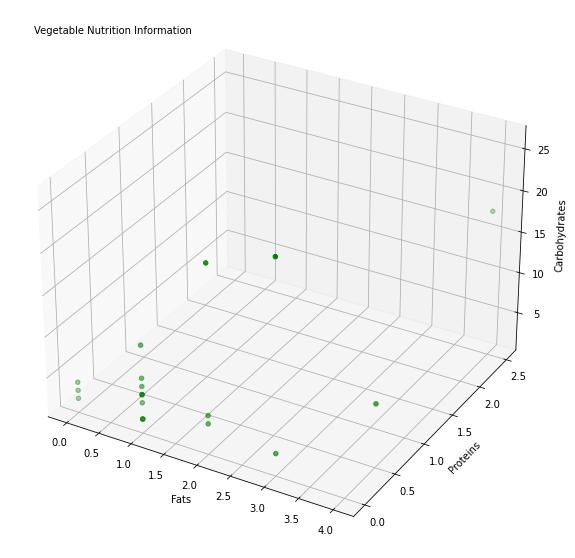

In [19]:
# set figure size
fig = plt.figure(figsize = [20,10])

# Vegetable Graph
ax = fig.gca(projection='3d')

zdata = veg_carb
xdata = veg_prot
ydata = veg_fat
ax.scatter3D(xdata, ydata, zdata, color='green')

ax.set_xlabel('Fats')
ax.set_ylabel('Proteins')
ax.set_zlabel('Carbohydrates')
ax.text2D(0.05, 0.95, "Vegetable Nutrition Information", transform=ax.transAxes)

Text(0.05, 0.95, 'Fruit Nutrition Information')

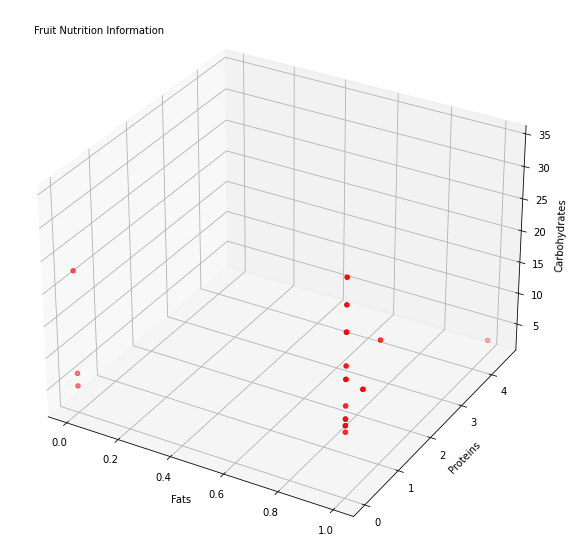

In [20]:
# set figure size
fig = plt.figure(figsize = [20,10])

# Vegetable Graph
ax = fig.gca(projection='3d')

zdata = fruit_carb
xdata = fruit_prot
ydata = fruit_fat
ax.scatter3D(xdata, ydata, zdata, color='red')

ax.set_xlabel('Fats')
ax.set_ylabel('Proteins')
ax.set_zlabel('Carbohydrates')
ax.text2D(0.05, 0.95, "Fruit Nutrition Information", transform=ax.transAxes)

Text(0.05, 0.95, 'Seafood Nutrition Information')

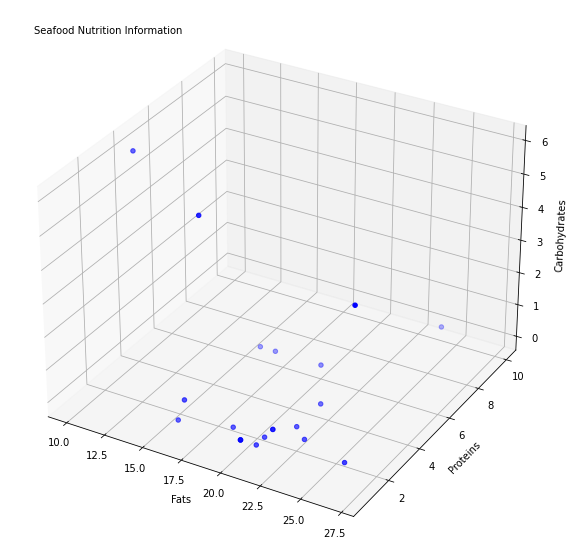

In [21]:
# set figure size
fig = plt.figure(figsize = [20,10])

# Vegetable Graph
ax = fig.gca(projection='3d')

zdata = sea_carb
xdata = sea_prot
ydata = sea_fat
ax.scatter3D(xdata, ydata, zdata, color='blue')

ax.set_xlabel('Fats')
ax.set_ylabel('Proteins')
ax.set_zlabel('Carbohydrates')
ax.text2D(0.05, 0.95, "Seafood Nutrition Information", transform=ax.transAxes)

#### Fats v. Proteins v. Carbohydrates

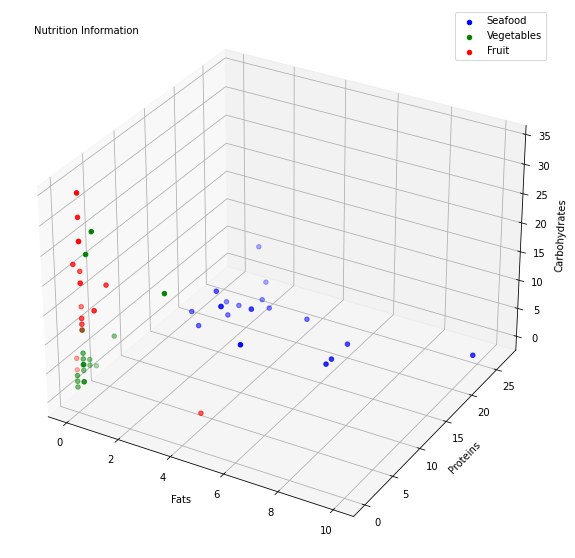

In [22]:
plt.figure(figsize=(15,10))
ax = plt.axes(projection = "3d")
ax.scatter(sea_fat,sea_prot, sea_carb, "o", c = "b", label = 'Seafood')
ax.scatter(veg_fat,veg_prot, veg_carb, "o", c = "g", label = 'Vegetables')
ax.scatter(fruit_fat,fruit_prot, fruit_carb, "o", c = "r", label = 'Fruit')
ax.set_xlabel('Fats')
ax.set_ylabel('Proteins')
ax.set_zlabel('Carbohydrates')
ax.text2D(0.05, 0.95, "Nutrition Information", transform=ax.transAxes)
plt.legend()

### Identify Food with Greatest Combination of Nutrients

In [23]:
# add up each foods fats, carbs, protein total
veg_total = veg_fat + veg_prot + veg_carb
fruit_total = fruit_fat + fruit_prot + fruit_carb
sea_total = sea_fat + sea_prot + sea_carb

In [24]:
# check the max value of each food group
print('Vegetable max:', max(veg_total))
print('Fruit max:', max(fruit_total))
print('Seafood max:', max(sea_total))

Vegetable max: 29.0
Fruit max: 35.0
Seafood max: 34.0


In [25]:
# find location of greatest Fruit value
# find index in fruit_total list
print(np.where(fruit_total == 35))

(array([0]),)


In [26]:
# find index in array where if fruit, then returns True
print(np.where(fruit_arr == True))

(array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39]),)


In [27]:
# find location of fruit in list of total foods
print(raw_clean.iloc[20,0])

Apple, 1 large (242 g/8 oz)


##### <font color='blue'>The food that produces the greatest combination of carbohydrates, proteins and fats is 1 Large Apple.</font>

### <font color='red'>Question: Which foods provide at least our daily maximum of Daily Value of any nutrient?

### Clean Data - Dropping Unnecessary Data

In [28]:
raw.keys()

Index(['Food and Serving', 'Calories', 'Calories�from Fat', 'Total Fat',
       'Total Fat.1', 'Sodium', 'Sodium.1', 'Potassium', 'Potassium.1',
       'Total Carbo-hydrate', 'Total Carbo-hydrate.1', 'Dietary Fiber',
       'Dietary Fiber.1', 'Sugars', 'Protein', 'Vitamin A', 'Vitamin C',
       'Calcium', '��Iron��', 'Saturated Fat', 'Saturated Fat.1',
       'Chole-sterol', 'Chole-sterol.1', 'Food Type'],
      dtype='object')

In [29]:
# columns to drop in raw data
cols = [1,2,3,5,7,9,11, 19, 20, 22]

# drop columns
raw_dv = raw.drop(raw.columns[cols], axis=1)

# drop first row
raw_dv = raw_dv.drop([raw_dv.index[0]])

In [30]:
raw_dv.head()

,Food and Serving,Total Fat.1,Sodium.1,Potassium.1,Total Carbo-hydrate.1,Dietary Fiber.1,Sugars,Protein,Vitamin A,Vitamin C,Calcium,��Iron��,Chole-sterol,Food Type
1,"Asparagus, 5 spears (93 g/3.3 oz)",0,0,7,1,8,2,2,10,15,2,2,NaN,"Vegetables, Serving Size (gram weight/�ounce w..."
2,"Bell Pepper, 1 medium (148 g/5.3 oz)",0,2,6,2,8,4,1,4,190,2,4,NaN,"Vegetables, Serving Size (gram weight/�ounce w..."
3,"Broccoli, 1 medium stalk (148 g/5.3 oz)",1,3,13,3,12,2,4,6,220,6,6,NaN,"Vegetables, Serving Size (gram weight/�ounce w..."
4,"Carrot, 1 carrot, 7"" long,�1 1/4"" diameter (78...",0,3,7,2,8,5,1,110,10,2,2,NaN,"Vegetables, Serving Size (gram weight/�ounce w..."
5,"Cauliflower, 1/6 medium head (99 g/3.5 oz)",0,1,8,2,8,2,2,0,100,2,2,NaN,"Vegetables, Serving Size (gram weight/�ounce w..."


### Clean Data - Changing Column Data Types

In [31]:
raw_dv.keys()

Index(['Food and Serving', 'Total Fat.1', 'Sodium.1', 'Potassium.1',
       'Total Carbo-hydrate.1', 'Dietary Fiber.1', 'Sugars', 'Protein',
       'Vitamin A', 'Vitamin C', 'Calcium', '��Iron��', 'Chole-sterol',
       'Food Type'],
      dtype='object')

In [32]:
# rename columns to be more concise, remove spacing and symbols
raw_dv.columns = 'Food and Serving', 'Fat_DV', 'Sodium_DV', 'Potassium_DV', 'Carbohydrates_DV', 'Fiber_DV', 'Sugars_g', 'Proteins_g', 'Vitamin_A_DV', 'Vitamin_C_DV', 'Calcium_DV', 'Iron_DV', 'Cholestrol_DV', 'Food_Type'
raw_dv.columns

Index(['Food and Serving', 'Fat_DV', 'Sodium_DV', 'Potassium_DV',
       'Carbohydrates_DV', 'Fiber_DV', 'Sugars_g', 'Proteins_g',
       'Vitamin_A_DV', 'Vitamin_C_DV', 'Calcium_DV', 'Iron_DV',
       'Cholestrol_DV', 'Food_Type'],
      dtype='object')

In [33]:
# check data types of columns
raw_dv.dtypes

# change column types
raw_dv.Fat_DV = raw_dv.Fat_DV.astype(float)
raw_dv.Sodium_DV = raw_dv.Sodium_DV.astype(float)
raw_dv.Potassium_DV = raw_dv.Potassium_DV.astype(float)
raw_dv.Carbohydrates_DV = raw_dv.Carbohydrates_DV.astype(float)
raw_dv.Fiber_DV = raw_dv.Fiber_DV.astype(float)
raw_dv.Sugars_g = raw_dv.Sugars_g.astype(float)
raw_dv.Proteins_g = raw_dv.Proteins_g.astype(float)
raw_dv.Vitamin_A_DV = raw_dv.Vitamin_A_DV.astype(float)
raw_dv.Vitamin_C_DV = raw_dv.Vitamin_C_DV.astype(float)
raw_dv.Calcium_DV = raw_dv.Calcium_DV.astype(float)
raw_dv.Iron_DV = raw_dv.Iron_DV.astype(float)
raw_dv.Cholestrol_DV = raw_dv.Cholestrol_DV.astype(float)

In [34]:
# double check column types have changed
raw_dv.dtypes

Food and Serving     object
Fat_DV              float64
Sodium_DV           float64
Potassium_DV        float64
Carbohydrates_DV    float64
Fiber_DV            float64
Sugars_g            float64
Proteins_g          float64
Vitamin_A_DV        float64
Vitamin_C_DV        float64
Calcium_DV          float64
Iron_DV             float64
Cholestrol_DV       float64
Food_Type            object
dtype: object

### Identify Values Greater than or Equal to Daily Values

In [35]:
# create list to store the food types 
# and the columns that contain DV
food_type = []
col_num = []

In [36]:
# save food types and columns with 100% or more DV
for i in range(len(raw_dv)):
    for j in range(1,(len(raw_dv.iloc[i])-1)):
        if raw_dv.iloc[i,j] >= 100:
            food_type.append(raw_dv.iloc[i,0])
            col_num.append(j)

In [37]:
# check for proteins and sugars
# these did not have a DV percent
# so must check if above DV grams

for i in range(len(raw_dv)):
    for j in range(6,8):
        # DV of proteins
        if raw_dv.iloc[i,6] >= 30:
            food_type.append(raw_dv.iloc[i,0])
            col_num.append(j)
        # DV of sugars
        if raw_dv.iloc[i,7] >= 51:
            food_type.append(raw_dv.iloc[i,0])
            col_num.append(j)

In [38]:
# identify what nutrient the column number corresponds with
for i in range(len(col_num)):
    if col_num[i] == 8:
        col_num[i] = 'Vitamin A'
    if col_num[i] == 9:
        col_num[i] = 'Vitamin C'
    if col_num[i] == 12:
        col_num[i] = 'Cholestrol'

In [39]:
# check col_num
col_num

['Vitamin C',
 'Vitamin C',
 'Vitamin A',
 'Vitamin C',
 'Vitamin A',
 'Vitamin A',
 'Vitamin A',
 'Vitamin C',
 'Vitamin C',
 'Vitamin C',
 'Vitamin C',
 'Cholestrol']

### List of Food with Values Greater than or Equal to Daily Values

In [40]:
# create dataframe to show what foods meet a Daily Value

food_df = pd.DataFrame(list(zip(food_type, col_num)),
               columns =['Food Type', 'Nutrient DV Met'])
food_df

,Food Type,Nutrient DV Met
0,"Bell Pepper, 1 medium (148 g/5.3 oz)",Vitamin C
1,"Broccoli, 1 medium stalk (148 g/5.3 oz)",Vitamin C
2,"Carrot, 1 carrot, 7"" long,�1 1/4"" diameter (78...",Vitamin A
3,"Cauliflower, 1/6 medium head (99 g/3.5 oz)",Vitamin C
4,"Leaf Lettuce, 1 1/2 cups shredded (85 g/3.0 oz)",Vitamin A
5,"Sweet Potato, 1 medium, 5"" long,�2"" diameter (...",Vitamin A
6,"Cantaloupe, 1/4 medium (134 g/4.8 oz)",Vitamin A
7,"Grapefruit, 1/2 medium, (154 g/5.5 oz)",Vitamin C
8,"Kiwifruit, 2 medium (148 g/5.3 oz)",Vitamin C
9,"Orange, 1 medium (154 g/5.5 oz)",Vitamin C


### <font color='red'>Question: How does the amount of sugar in fruit compare to that in popular Halloween candy?

### Clean Data - Dropping Unnecessary Data

In [41]:
# columns to drop in raw data
cols = [0,2,3,4,6]

# drop columns
candy_cleaned = candy.drop(candy.columns[cols], axis=1)
# drop NA values
candy_cleaned = candy_cleaned.dropna()

# rename columns
candy_cleaned.columns = 'Name', 'Calories', 'Sugar_g'
candy_cleaned.head()

,Name,Calories,Sugar_g
0,TOBLERONE,525,55.74
1,HONEY-COMBED,486,62.68
2,TOOTSIE ROLL,387,56.32
3,ALMOND JOY CANDY BAR,479,48.34
5,NESTLE,375,48.00


### Clean Data - Subgroup Fruit Data

In [42]:
# create empty array to hold fruit sugar values
fruit_sug = ([])
fruit_name = ([])

# fill array with fruit sugar values
for i in range(len(fruit_arr)):
    if fruit_arr[i] == True:
        fruit_sug = np.append(fruit_sug, raw_clean.iloc[i,4])
        fruit_name = np.append(fruit_name, raw_clean.iloc[i,0])

### Comparing Candy and Fruit Sugar Amounts

Text(0.5, 1.0, 'Fruit Sugar Statistics')

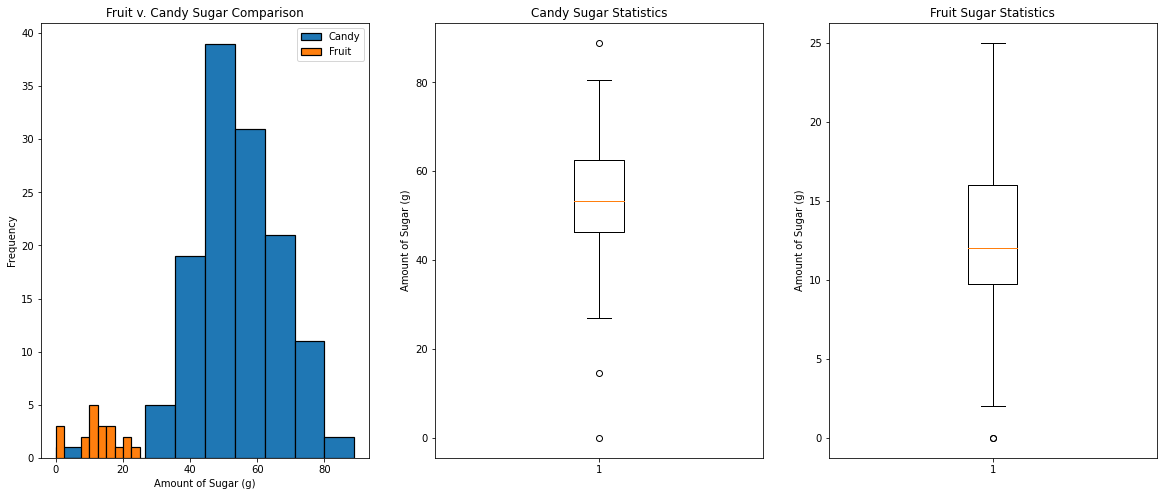

In [43]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
# plot candy sugar amount and frequency
plt.hist(candy_cleaned['Sugar_g'], label = 'Candy', edgecolor='black', linewidth=1.2)
# plot fruit sugar amount and frequency
plt.hist(fruit_sug, label = 'Fruit', edgecolor='black', linewidth=1.2)
# graph labels
plt.xlabel('Amount of Sugar (g)')
plt.ylabel('Frequency')
plt.title('Fruit v. Candy Sugar Comparison')
plt.legend()

# boxplot of candy sugar amount
plt.subplot(1,3,2)
plt.boxplot(candy_cleaned['Sugar_g'])
plt.ylabel('Amount of Sugar (g)')
plt.title('Candy Sugar Statistics')

# boxplot of fruit sugar amount
plt.subplot(1,3,3)
plt.boxplot(fruit_sug)
plt.ylabel('Amount of Sugar (g)')
plt.title('Fruit Sugar Statistics')

### <font color='red'> Question: Are there any fruits that have the same or more sugar as the candies we looked at?

In [44]:
# find max value of sugar in fruit
max(fruit_sug)

25.0

In [45]:
# find any candies with 25 or fewer grams of sugar
candy_25_name = ([])
candy_25_amount = ([])

# append candy name and sugar amount to array
for i in range(len(candy_cleaned['Sugar_g'])):
    if candy_cleaned.iloc[i,2] <= 25:
        candy_25_name = np.append(candy_25_name, candy_cleaned.iloc[i,0])
        candy_25_amount = np.append(candy_25_amount, candy_cleaned.iloc[i,2])

In [46]:
# output candy name and sugar amounts
print(candy_25_name)
print(candy_25_amount)

['HARD' 'CHOC COVERED']
[ 0.   14.63]


In [47]:
# identify what fruits have more sugar than the low sugar candy
fruit_25_name = ([])
fruit_25_amount = ([])

# append fruit names and sugar amounts to array
for i in range(len(fruit_sug)):
    if fruit_sug[i] >= 14.63:
        fruit_25_name = np.append(fruit_25_name, fruit_name[i])
        fruit_25_amount = np.append(fruit_25_amount, fruit_sug[i])

In [48]:
# create dataframe to show what fruits had more sugar than low-sugar candy

fruit_sug_df = pd.DataFrame(list(zip(fruit_25_name, fruit_25_amount)),
               columns =['Fruit with High Sugar', 'Sugar (g)'])

fruit_sug_df

,Fruit with High Sugar,Sugar (g)
0,"Apple, 1 large (242 g/8 oz)",25.0
1,"Banana, 1 medium (126 g/4.5 oz)",19.0
2,"Grapes, 3/4 cup (126 g/4.5 oz)",20.0
3,"Pear, 1 medium (166 g/5.9 oz)",16.0
4,"Plums, 2 medium (151 g/5.4 oz)",16.0
5,Sweet�Cherries 21 cherries;�1 cup,16.0
6,"Watermelon, 1/18 medium melon; 2 cups diced pi...",20.0


### <font color='red'> Question: How does the amount of calories in candy compare to the breakfast cereals?

### Clean Data - Create Cereal Dataframe
#### Specifying Kelloggs' subset of cereals to compare with candy

In [49]:
# create dataframe to store Kelloggs information
kelloggs_df = pd.DataFrame()

# find locations of Kelloggs items
kelloggs_bool = abbrev['Shrt_Desc'].str.contains('KELLOGG')

# find location of cereals
cereals_bool = abbrev['Shrt_Desc'].str.contains('CEREAL')

In [50]:
# where KELLOGG and CEREAL is found, append row to Kelloggs dataframe
for i in range(len(abbrev['Shrt_Desc'])):
    if ((cereals_bool[i] == True) and (kelloggs_bool[i] == True)):
        kelloggs_df = kelloggs_df.append(abbrev.iloc[i,:])

### Compare Kelloggs' Calories to Candy Calories

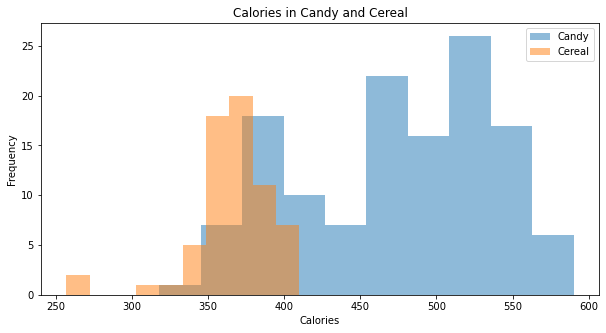

In [51]:
plt.figure(figsize = [10,5])
plt.hist(candy_cleaned['Calories'], alpha = 0.5, label = 'Candy')
plt.hist(kelloggs_df['Energ_Kcal'], alpha = 0.5, label = 'Cereal')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Calories in Candy and Cereal')
plt.legend()

## Results

### Comparing Raw Foods

#### Which of the foods is packed with the greatest combination of proteins, fats and carbohydrates?

Before calculating the data of the total amount of proteins, fats and carbohydrates in each food, we first extracted each food group and its nutrient values separately from the data set. This allowed for a graphical representation where each of the nutrients lied along an axis and we could more clearly see the relationship between types of food and their nutrient make-up. This is shown in the 3D graph below. Depending on if a food had a high amount of a certain nutrient, it is shifted towards the one end of the graph.   

The graph shows a few trends based on the nutrient each group of food contained. Fruits tended to be high in carbohydrates and seafood was higher in proteins. Many of vegetables considered in this study are clustered near the corner, showing they are lower in fats, proteins and carbohydrates.

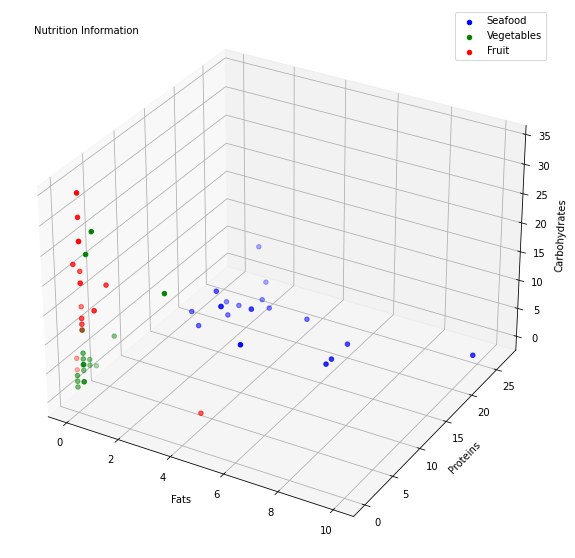

In [52]:
plt.figure(figsize=(15,10))
ax = plt.axes(projection = "3d")
ax.scatter(sea_fat,sea_prot, sea_carb, "o", c = "b", label = 'Seafood')
ax.scatter(veg_fat,veg_prot, veg_carb, "o", c = "g", label = 'Vegetables')
ax.scatter(fruit_fat,fruit_prot, fruit_carb, "o", c = "r", label = 'Fruit')
ax.set_xlabel('Fats')
ax.set_ylabel('Proteins')
ax.set_zlabel('Carbohydrates')
ax.text2D(0.05, 0.95, "Nutrition Information", transform=ax.transAxes)
plt.legend()

Vegetables, fruits and seafood are each known to contain high volumes of certain nutrients. When we strictly considered proteins, fats and carbohydrates found in the foods though, we summed up the content amount of each nutrient per food. This means a food high in carbohydrate content but low in fat content could score the same  as a food high in protein but low in carbohydrates. 

When we took the total amount of fats, proteins and carbohydrates into consideration though, the **Apple** contained the highest total amount of these nutrients.

In [53]:
# add up each foods fats, carbs, protein total
veg_total = veg_fat + veg_prot + veg_carb
fruit_total = fruit_fat + fruit_prot + fruit_carb
sea_total = sea_fat + sea_prot + sea_carb

# check which type of food has the greatest sum of the three
print('Vegetable max:', max(veg_total))
print('Fruit max:', max(fruit_total))
print('Seafood max:', max(sea_total))

# find location of greatest Fruit value

# find index in fruit_total list
print(np.where(fruit_total == 35))

# find index in nutrition array where if fruit, then returns True
print(np.where(fruit_arr == True))

Vegetable max: 29.0
Fruit max: 35.0
Seafood max: 34.0
(array([0]),)
(array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39]),)


In [54]:
# find location of fruit in dataframe of foods
print(raw_clean.iloc[20,0])

Apple, 1 large (242 g/8 oz)


#### Which foods provide at least one daily maximum Daily Value of any nutrient?

Most of the nutrients within our dataset had a column assigned to the quantity of each nutrient in the food and another column with the percentage of Daily Values. For the columns with the Daily Value percentage, we could look to see where the value was 100 or above, indicating it provided 100% or more of our suggested daily intake of the nutrient.

There were two nutrients that contained the measured amount of each nutrient present in each food but did NOT have an additional column that contained the Daily Value percentage. These nutrients were protein and sugar. In this case, we took the average of the male and female suggested daily value amount and set this as the suggested daily value for proteins and sugars. Then, we checked to see if any of the sugar or protein amounts are greater than their suggested daily value amount.

After we checked all the nutrient values for each food to see if they met the the daily value, we compiled a list of which foods met a daily value and for what nutrient. Most of the Daily Values met were for Vitamin C and some for Vitamin A. The list below shows our results:

In [55]:
# dataframe to show what foods meet a Daily Value
food_df

,Food Type,Nutrient DV Met
0,"Bell Pepper, 1 medium (148 g/5.3 oz)",Vitamin C
1,"Broccoli, 1 medium stalk (148 g/5.3 oz)",Vitamin C
2,"Carrot, 1 carrot, 7"" long,�1 1/4"" diameter (78...",Vitamin A
3,"Cauliflower, 1/6 medium head (99 g/3.5 oz)",Vitamin C
4,"Leaf Lettuce, 1 1/2 cups shredded (85 g/3.0 oz)",Vitamin A
5,"Sweet Potato, 1 medium, 5"" long,�2"" diameter (...",Vitamin A
6,"Cantaloupe, 1/4 medium (134 g/4.8 oz)",Vitamin A
7,"Grapefruit, 1/2 medium, (154 g/5.5 oz)",Vitamin C
8,"Kiwifruit, 2 medium (148 g/5.3 oz)",Vitamin C
9,"Orange, 1 medium (154 g/5.5 oz)",Vitamin C


### Comparing Candy to Other Food

#### How does the amount of sugar in fruit compare to that in popular Halloween candy?

While sugar is found in most foods, fruit is especially known for its sugar content; it is known for its other nutritional value but here we looked particularly at its sugar content. Specifically how the amount of sugar in fruit in our dataset compared to the sugar amount of popular Halloween candies. When looking at the results, we found most candy has a higher sugar content than fruit. 

Our histogram shows most candy has a higher amount of sugar than cereal. Additionally, the boxplots reinforce this point. Note the y-axis is greater on the candy boxplot than the fruit boxplot. We can see the mean, percentiles and overall range for fruit is lower than that of candy.

Text(0.5, 1.0, 'Fruit Sugar Statistics')

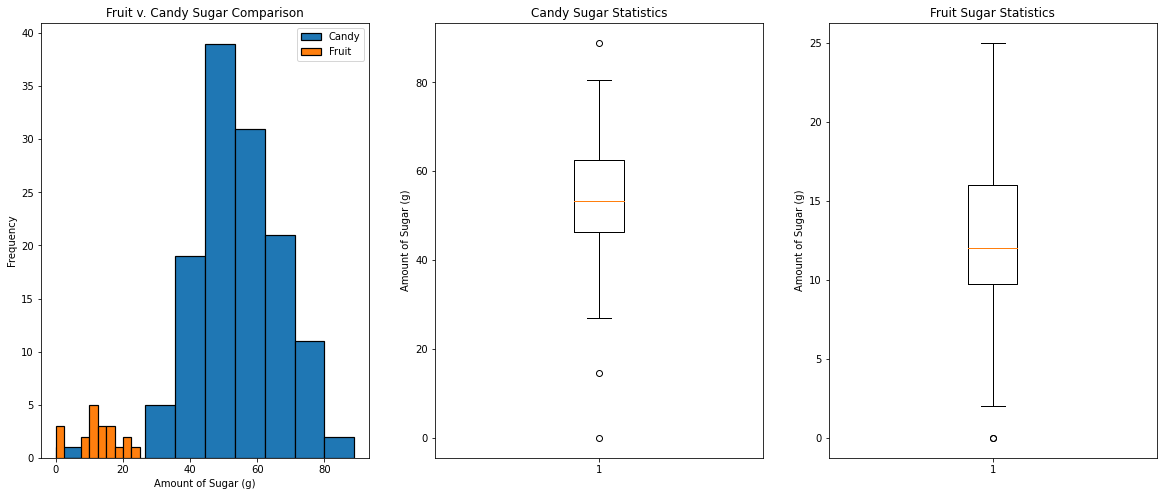

In [56]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
# plot candy sugar amount and frequency
plt.hist(candy_cleaned['Sugar_g'], label = 'Candy', edgecolor='black', linewidth=1.2)
# plot fruit sugar amount and frequency
plt.hist(fruit_sug, label = 'Fruit', edgecolor='black', linewidth=1.2)
# graph labels
plt.xlabel('Amount of Sugar (g)')
plt.ylabel('Frequency')
plt.title('Fruit v. Candy Sugar Comparison')
plt.legend()

# boxplot of candy sugar amount
plt.subplot(1,3,2)
plt.boxplot(candy_cleaned['Sugar_g'])
plt.ylabel('Amount of Sugar (g)')
plt.title('Candy Sugar Statistics')

# boxplot of fruit sugar amount
plt.subplot(1,3,3)
plt.boxplot(fruit_sug)
plt.ylabel('Amount of Sugar (g)')
plt.title('Fruit Sugar Statistics')

#### Are there any fruits that have the same or more sugar than the candies we looked at?

We did find though there are some candies that are lower in sugar amounts than certain fruits. This can be seen the histogram above where we have a blue bar (candy sugar amount) amongst orange bars (fruit sugar amounts). We analyzed what fruits were higher in sugar than those candies. Our results are the fruits that are found to have a higher sugar content than 14.63 grams of sugar, the highest amount of sugar found in the low sugar area. There were seven fruits found to have a larger sugar content: Apple, Banana, Grapes, Pear, Plums, Sweet Cherries and Watermelon.

In [57]:
# dataframe containing fruit and higher sugar amounts
fruit_sug_df

,Fruit with High Sugar,Sugar (g)
0,"Apple, 1 large (242 g/8 oz)",25.0
1,"Banana, 1 medium (126 g/4.5 oz)",19.0
2,"Grapes, 3/4 cup (126 g/4.5 oz)",20.0
3,"Pear, 1 medium (166 g/5.9 oz)",16.0
4,"Plums, 2 medium (151 g/5.4 oz)",16.0
5,Sweet�Cherries 21 cherries;�1 cup,16.0
6,"Watermelon, 1/18 medium melon; 2 cups diced pi...",20.0


#### How does the amount of calories in candy compare to the breakfast cereals?

When looking at the results of calories in candy compared the that of breakfast cereal, we find generally breakfast cereal has fewer calories than candy. It is important to note though that there is a lot of overlap in the amount of calories in cereal and the amount of calories in low calorie candy. As seen in the histogram below, most of the breakfast cereal histogram bars overlap with candy histogram bars to different degrees.

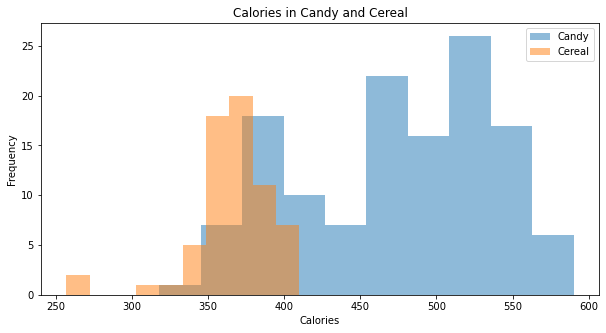

In [58]:
plt.figure(figsize = [10,5])
plt.hist(candy_cleaned['Calories'], alpha = 0.5, label = 'Candy')
plt.hist(kelloggs_df['Energ_Kcal'], alpha = 0.5, label = 'Cereal')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Calories in Candy and Cereal')
plt.legend()

## Discussion and Conclusion

When we were looking to find what food contains the highest combination of fats, carbohydrates and protein amount, we also found additional information about the food groups when graphing fruits, vegetables and proteins. As stated earlier, we saw fruits generally had a higher amount of carbohydrates, seafood generally had a higher amount of protein, and vegetables generally had low amounts of fats, proteins and carbohydrates. When we did find the food with the highest amount of combination of fats, proteins and carbohydrates, we found it to be 1 large Apple.  

We then looked at if any foods met the the Daily Value for certain nutrients. We found that our daily Vitamin C amount is met when consuming the dataset's suggested amount of Bell Pepper, Broccoli, Cauliflower, Grapefruit, Kiwifruit, Orange, and Strawberries. Additionally, our daily amount of Vitamin A was met when consuming the dataset's suggested amount of Carrot, Leaf Lettuce, Sweet Potato, and Cantaloupe. Lastly, our daily amount of Cholestrol was meet when consuming the dataset's suggested amount of shrimp.

When considering how the amount of sugar in candy compares to that in fruit, we found fruits generally had lower amounts of sugar than candies with a few exceptions. There were two candies that were lower in sugar then some of the fruits. Apart from this, all of the candies were higher in sugar than the fruits. The fruits that were higher in sugar than the low sugar candy though were Apple, Banana, Grapes, Pear, Plums, Sweet Cherries and Watermelon. When looking at the cereals, we saw there was an overlap between the amount of sugar found in cereals and candies. The cereals with larger amounts of sugar overlapped with the candies that had a lower amount of sugar.

---
The primary obstacle I ran into when trying to compare within and among different food groups was the serving size of each food. If you look at the dataset, you will see the foods are not of the same mass but are of sizes that most people would consume. For example, Watermelon is quantified as 2 cups of diced pieces and Apple is quantified as one large apple. While these sizes may be similar, they are not the same. I decided to move foward with these measurements even though they may not be equivalent due to the fact that most people eat the amounts designated for each food in the dataframe. This obstacle occurred in all the datasets.

Other obstacles I ran into was cleaning the pandas dataframes and converting them into arrays. When the dataframe was read in, it had some unknown symbol that needed to be removed; it also had column names with spaces in them which would be difficult to use for certain functions. When trying to use the numerical values in the dataframe, they were not originally of type 'float' or 'int'. This took me a bit to realize but was able to convert them into  floats so the numbers could be used for comparisons and mathematical calulcations.

---

One change I would make next time would be to read in the dataframes with numpy and automatically assign each column as an array. This potentially would have reduced the amount of data cleaning I would need to do since some of my initial data cleaning required the conversion of pandas columns into arrays. It was important that I display the information in a clean way though as opposed to lists of arrays. I later learned how to do so but remembering all the array names and specific indices could be a bit cumbersome as opposed to easily using strings to find locations in panda dataframes.

In terms of my data, one change I would make next time is to look at a larger cereal dataset. Cereal can range broadly in the amount of nutrients they can contain; some cereals contain large amounts of sugars and calories and other healthier ones contain less. I would make sure the dataset contains a rough equal representation of these types of cereals. Additionally, I would expand the foods I looked at to include a larger variety of high protein foods, specifically chicken and beef. This particular dataset was restricted to seafood but I would include more of a variation in high-protein foods. This can also be said for the vegetables within the dataset in terms of carbohydrates. There are some vegetables that are higher in carbohydrates so I would make sure to include those within the dataset to add more variation.

### References

1. “3D Plots as Subplots.” 3D Plots as Subplots - Matplotlib 3.5.0 Documentation, Matplotlib.org, https://matplotlib.org/stable/gallery/mplot3d/subplot3d.html. 

2. Center for Food Safety and Applied Nutrition. “Food Labeling &amp; Nutrition.” U.S. Food and Drug Administration, FDA, https://www.fda.gov/food/food-labeling-nutrition. 

3. Goren, Uri. “Check If String Is in a Pandas Dataframe.” Stack Overflow, Stack Overflow, 20 June 2015, https://stackoverflow.com/questions/30944577/check-if-string-is-in-a-pandas-dataframe/30946773. 

4. Helsinger, Adam. “Food Nutrition Information - Dataset.” Data.world, Data World, 22 Mar. 2017, https://data.world/adamhelsinger/food-nutrition-information. 

5. Majithia, Mansi, et al. “Project-Candy-Dataset: Extract, Transform, and Load for Two Candy Datasets.” GitHub, Mansi Majithia, 1 Sept. 2020, https://github.com/mansimajithia/ETLProject-Candy-Dataset. 

6. “Nutrient Data Laboratory.” US Department of Agriculture, Agricultural Research Service, USDA National Nutrient Database for Standard Reference, May 2016, http://www.ars.usda.gov/nea/bhnrc/mafcl. 